In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
%reload_ext autoreload


In [ ]:
import numpy as np
import random
import scipy.special
from collections import Counter

In [ ]:
from tree import Tree, generate_root_sequence, simulate_sequences, mutate_sequence, coalescence_tree_with_sequences


In [ ]:
sample_size = 5
num_states = 4  # For DNA 
seq_length = 10
mutation_rate = 0.01

tree, sequences = coalescence_tree_with_sequences(sample_size, num_states, seq_length, mutation_rate)
print("Coalescence Tree:", vars(tree))
print("Sequences at the leaves:", sequences)



In [ ]:
import numpy as np
import random
import scipy.special
import math

def compute_log_likelihood_for_thetas(tree, theta_values, pi):
    log_likelihoods = []

    for theta in theta_values:
        # Calculate the log likelihood with the given mutation rate (theta)
        log_likelihood = tree.compute_log_likelihood(theta, pi)
        log_likelihoods.append(log_likelihood)

    return log_likelihoods


In [ ]:
# Plotting the log likelihood vs theta
import matplotlib.pyplot as plt

# Define stationary probabilities (pi)
pi = np.array([0.5, 0.5])  # Assuming equal base frequencies for binary states

# Define the sequences
sequences = [
    "01001010100101010011",
    "01001010100101010011",
    "01001010100101010011"
]

# Convert sequences to numerical format and validate
num_sequences = []
for seq in sequences:
    num_seq = []
    for base in seq:
        if base not in '01':
            raise ValueError(f"Invalid state '{base}' found in sequence. [only '0' and '1'].")
        num_seq.append(int(base))
    num_sequences.append(num_seq)

# Define the number of leaves for each sequence
num_leaves = [13, 21, 16]

# Create the full sequence array
full_sequences = []
for seq, count in zip(num_sequences, num_leaves):
    full_sequences.extend([seq] * count)

print("Full Sequences:")
for seq in full_sequences:
    print(seq)

# Initialize the tree
sample_size = 50
n_states = 2  # For example, binary states
tree = Tree(sample_size, n_states=n_states, sequences=full_sequences)


In [ ]:
# Define theta values to test
theta_values = np.arange(0.2, 2.0, 0.2)

# Compute log likelihoods for thetas
log_likelihoods = compute_log_likelihood_for_thetas(tree, theta_values, pi)

# Output the results
for theta, log_likelihood in zip(theta_values, log_likelihoods):
    print(f"Theta: {theta}, Log Likelihood: {log_likelihood}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_values, log_likelihoods, marker='o', linestyle='-', color='b')
plt.xlabel('Mutation Rate')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Mutation Rate')
plt.grid(True)
plt.show()


In [ ]:
from mcmc import kingman_mcmc
from recorder import Recorder
from tree import Tree
from tree import coalescence_tree_with_sequences
# import numpy as np

# Parameters
sample_size = 4
n_states = 2
seq_length = 10
steps = 10
mutation_rate = 2  # Example mutation rate
pi = [0.5, 0.5]  # Example base frequency distribution


# Generate tree and sequences
tree, sequences = coalescence_tree_with_sequences(sample_size, n_states, seq_length, mutation_rate)

# Initialize tree with sequences
tree.sequences = sequences
print("Sequence")
print(sequences)
# Initialize recorder
recorder = Recorder(tree, sample_size, seq_length)

# Run MCMC
acceptance_prob = kingman_mcmc(tree, recorder, mutation_rate, pi)

# Extract tree sequence
ts = recorder.tree_sequence()

# Print tree sequence and acceptance probability
print(ts.draw_text())
print("Acceptance probability =", acceptance_prob)

# Write additional information to txt file
recorder.write_additional_info('additional_info.txt')

# Read and print the new txt file
with open('additional_info.txt', 'r') as f:
    print(f.read())

# Access stored mutation rates, log-likelihoods, and gradients from the recorder
mutation_rates = recorder.mutation_rates
log_likelihoods = recorder.log_likelihoods
gradients = recorder.gradients

# Print the additional information
for i, (mutation_rate, log_likelihood, gradient) in enumerate(zip(mutation_rates, log_likelihoods, gradients)):
    print(f"Tree {i}:")
    print(f"Mutation Rate: {mutation_rate}")
    print(f"Log Likelihood: {log_likelihood}")
    print(f"Gradient: {gradient}")
    print()


In [1]:
import numpy as np
import matplotlib.pyplot as plt


sequences = [
    "01001010100101010011",
    "01001010100101010011",
    "01001010100101010011"
]

# Convert sequences to numerical format and validate
num_sequences = []
for seq in sequences:
    num_seq = []
    for base in seq:
        if base not in '01':
            raise ValueError(f"Invalid state '{base}' found in sequence. [only '0' and '1'].")
        num_seq.append(int(base))
    num_sequences.append(num_seq)

# Define the number of leaves for each sequence
num_leaves = [13, 21, 16]

# Create the full sequence array
full_sequences = []
for seq, count in zip(num_sequences, num_leaves):
    full_sequences.extend([seq] * count)

print("Full Sequences:")
for seq in full_sequences:
    print(seq)

Full Sequences:
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0

In [5]:
from mcmc import kingman_mcmc
from recorder import Recorder
from tree import Tree

# Parameters
sample_size = 50
n_states = 2
seq_length = 20
steps = 10
mutation_rate = 0.1  # Example mutation rate
pi = [0.5, 0.5]  # Example base frequency distribution


# Initialize tree with sequences
tree = Tree(sample_size, n_states=n_states, sequences=full_sequences)
# tree.sequences = full_sequences

# Initialize recorder
recorder = Recorder(tree, sample_size, seq_length=100)

# Run MCMC
acceptance_prob = kingman_mcmc(tree, recorder, mutation_rate, pi, steps=99)

# Extract tree sequence
ts = recorder.tree_sequence()

# Print tree sequence and acceptance probability
print(ts.draw_text())
print("Acceptance probability =", acceptance_prob)

# Write additional information to txt file
recorder.write_additional_info('additional_info.txt')

# Read and print the new txt file
with open('additional_info.txt', 'r') as f:
    print(f.read())

# Access stored mutation rates, log-likelihoods, and gradients from the recorder
mutation_rates = recorder.mutation_rates
log_likelihoods = recorder.log_likelihoods
gradients = recorder.gradients

# Print the additional information
for i, (mutation_rate, log_likelihood, gradient) in enumerate(zip(mutation_rates, log_likelihoods, gradients)):
    print(f"Tree {i}:")
    print(f"Mutation Rate: {mutation_rate}")
    print(f"Log Likelihood: {log_likelihood}")
    # print(f"Gradient: {gradient}")
    print()


/home/shlok/code/ts-mcmc/tree.py:220: RuntimeWarning: divide by zero encountered in log
  return numpy.log(root_log_likelihood)


Old mutation rate: 1.0
New mutation rate: 0.9081690845328851
Old mutation rate: 1.0
New mutation rate: 0.9540419151156687
Old mutation rate: 1.0
New mutation rate: 0.9454343548557775
Old mutation rate: 1.0
New mutation rate: 0.9427412560346521
Old mutation rate: 1.0
New mutation rate: 0.7958351653341894
Old mutation rate: 1.0
New mutation rate: 1.1307195221130184
Old mutation rate: 1.0
New mutation rate: 0.9937840777380356
Old mutation rate: 1.0
New mutation rate: 1.0861306917710407
Old mutation rate: 1.0
New mutation rate: 0.9675132858696721
Old mutation rate: 1.0
New mutation rate: 1.079210248915418
Old mutation rate: 1.0
New mutation rate: 0.9668110477571389
Old mutation rate: 1.0
New mutation rate: 0.9357693680771675
Old mutation rate: 1.0
New mutation rate: 1.1134045492941889
Old mutation rate: 1.0
New mutation rate: 0.9190771790647759
Old mutation rate: 1.0
New mutation rate: 1.0047078684561213
Old mutation rate: 1.0
New mutation rate: 0.8975080992893131
Old mutation rate: 1.0
Ne

Truncated Mutation Rates:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


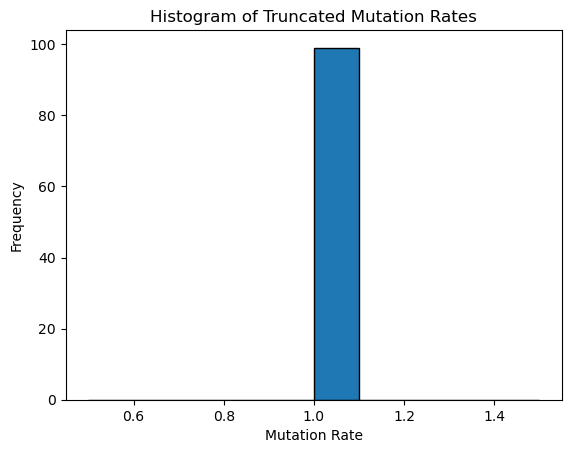

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assume mutation_rates is the list of mutation rates from the recorder
mutation_rates = recorder.mutation_rates

# Function to truncate the mutation rates
def truncate(number, decimals=2):
    factor = 10.0 ** decimals
    return np.trunc(number * factor) / factor

# Truncate mutation rates to 2 decimal places
truncated_mutation_rates = [truncate(rate, 1) for rate in mutation_rates]
print("Truncated Mutation Rates:")
print(truncated_mutation_rates)
# Plot histogram of truncated mutation rates
plt.hist(truncated_mutation_rates, bins=10, edgecolor='black')
plt.xlabel('Mutation Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Truncated Mutation Rates')
plt.show()


In [ ]:
tree_list = list(enumerate(ts.trees()))

# Print the list
print(tree_list[2][1].mutation_rates  )


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tskit

# Assuming the Tree class and functions are defined as provided

# Parameters
sample_size = 4
n_states = 2
seq_length = 10

# Function to generate random sequences
def generate_random_sequences(sample_size, seq_length, n_states):
    return np.random.randint(0, n_states, (sample_size, seq_length)).tolist()

# Generate mutation rates for each tree
mutation_rates_all_trees = []

for tree_index, tskit_tree in enumerate(ts.trees()):
    sequences = generate_random_sequences(sample_size, seq_length, n_states)
    
    # Determine the number of nodes in the tskit_tree
    num_nodes = tskit_tree.num_nodes
    
    # Initialize custom_tree with the correct number of nodes
    custom_tree = Tree(sample_size, n_states=n_states, sequences=sequences)
    
    # Ensure custom_tree arrays can accommodate all nodes
    custom_tree.left_child = np.full(num_nodes, -1)
    custom_tree.right_child = np.full(num_nodes, -1)
    custom_tree.parent = np.full(num_nodes, -1)
    custom_tree.time = np.zeros(num_nodes)
    
    # Extract tree structure information from tskit_tree to custom_tree
    for node in tskit_tree.nodes():
        if tskit_tree.parent(node) != tskit.NULL:
            custom_tree.parent[node] = tskit_tree.parent(node)
        custom_tree.time[node] = tskit_tree.time(node)
        children = list(tskit_tree.children(node))
        if len(children) > 0:
            custom_tree.left_child[node] = children[0]
            if len(children) > 1:
                custom_tree.right_child[node] = children[1]
        else:
            custom_tree.left_child[node] = -1
            custom_tree.right_child[node] = -1

    mutation_rates_all_trees.append(custom_tree.mutation_rates)

# Convert to numpy array for easier manipulation
mutation_rates_all_trees = np.array(mutation_rates_all_trees)

# Plot the mutation rates
plt.figure(figsize=(10, 6))

for i, mutation_rates in enumerate(mutation_rates_all_trees.T):
    plt.plot(mutation_rates, marker='o', linestyle='-', label=f'Node {i}')

plt.xlabel('Tree Index')
plt.ylabel('Mutation Rate')
plt.title('Mutation Rates for Each Node Across Trees')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tskit

# Define stationary probabilities (pi)
pi = np.array([0.5, 0.5])  # Assuming equal base frequencies for binary states

# Define the sequences
sequences = [
    "01001010100101010011",
    "01001010100101010011",
    "01001010100101010011"
]

# Convert sequences to numerical format and validate
num_sequences = []
for seq in sequences:
    num_seq = []
    for base in seq:
        if base not in '01':
            raise ValueError(f"Invalid state '{base}' found in sequence. [only '0' and '1'].")
        num_seq.append(int(base))
    num_sequences.append(num_seq)

# Define the number of leaves for each sequence
num_leaves = [13, 21, 16]

# Create the full sequence array
full_sequences = []
for seq, count in zip(num_sequences, num_leaves):
    full_sequences.extend([seq] * count)

print("Full Sequences:")
for seq in full_sequences:
    print(seq)

# Initialize the tree
sample_size = 50
n_states = 2  # For example, binary states

# Define theta values to test
theta_values = np.arange(0.2, 2.0, 0.2)

# Collect log likelihoods for each theta
log_likelihoods_all_trees = []

# Assuming ts is the tree sequence object defined somewhere in your script
for tree_index, tskit_tree in enumerate(ts.trees()):
    sequences = full_sequences  # Use the predefined full_sequences
    
    # Determine the number of nodes in the tskit_tree
    num_nodes = tskit_tree.num_nodes
    
    # Initialize custom_tree with the correct number of nodes
    custom_tree = Tree(sample_size=sample_size, n_states=n_states, sequences=sequences)
    # custom_tree.initialize_arrays(num_nodes)
    
    # Extract tree structure information from tskit_tree to custom_tree
    for node in tskit_tree.nodes():
        if tskit_tree.parent(node) != tskit.NULL:
            custom_tree.parent[node] = tskit_tree.parent(node)
        custom_tree.time[node] = tskit_tree.time(node)
        children = list(tskit_tree.children(node))
        if len(children) > 0:
            custom_tree.left_child[node] = children[0]
            if len(children) > 1:
                custom_tree.right_child[node] = children[1]
        else:
            custom_tree.left_child[node] = -1
            custom_tree.right_child[node] = -1
    
    tree_log_likelihoods = []
    for theta in theta_values:
        log_likelihood = custom_tree.compute_log_likelihood(theta, pi)
        tree_log_likelihoods.append(log_likelihood)
    
    log_likelihoods_all_trees.append(tree_log_likelihoods)

# Average log likelihoods across all trees
average_log_likelihoods = np.mean(log_likelihoods_all_trees, axis=0)

# Plot mutation rates (theta values) vs log likelihoods
plt.figure(figsize=(10, 6))
plt.plot(theta_values, average_log_likelihoods, marker='o', linestyle='-', color='b')
plt.xlabel('Mutation Rate (Theta)')
plt.ylabel('Average Log-Likelihood')
plt.title('Average Log-Likelihood vs Mutation Rate')
plt.grid(True)
plt.show()


In [ ]:
from stein_thinning_trees.thinning import thin

        


In [ ]:
# Example usage
theta_values = np.arange(0.2, 2.0, 0.2)
pi = [0.5, 0.5]

grad = []

for tree_index, tskit_tree in enumerate(ts.trees()):
    sequences = generate_random_sequences(sample_size, seq_length, n_states)
    
    # Determine the number of nodes in the tskit_tree
    num_nodes = tskit_tree.num_nodes
    
    # Initialize custom_tree with the correct number of nodes
    custom_tree = Tree(sample_size, n_states=n_states, sequences=sequences)
    
    # Ensure custom_tree arrays can accommodate all nodes
    custom_tree.left_child = np.full(num_nodes, -1)
    custom_tree.right_child = np.full(num_nodes, -1)
    custom_tree.parent = np.full(num_nodes, -1)
    custom_tree.time = np.zeros(num_nodes)
    
    # Extract tree structure information from tskit_tree to custom_tree
    for node in tskit_tree.nodes():
        if tskit_tree.parent(node) != tskit.NULL:
            custom_tree.parent[node] = tskit_tree.parent(node)
        custom_tree.time[node] = tskit_tree.time(node)
        children = list(tskit_tree.children(node))
        if len(children) > 0:
            custom_tree.left_child[node] = children[0]
            if len(children) > 1:
                custom_tree.right_child[node] = children[1]
        else:
            custom_tree.left_child[node] = -1
            custom_tree.right_child[node] = -1

    gradients = custom_tree.compute_gradient(theta_values[0], pi)  # Compute gradients for a given mutation rate
    grad.append(gradients)

# grad is now an array of gradients for each tree
print(f"Gradients for each tree: {grad}")


In [ ]:
idx = thin(ts, grad, 4)
